In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [2]:
adult = pd.read_csv('../DSI-CHI-1/lessons/week-07/1.2-k-means-lab/assets/datasets/adult.csv')

In [4]:
adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small


In [5]:
adult.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
df = adult[['occupation', 'workclass', 'education', 'capital-gain', 'sex']].copy()
df.head()

,occupation,workclass,education,capital-gain,sex
0,Adm-clerical,State-gov,Bachelors,2174,Male
1,Exec-managerial,Self-emp-not-inc,Bachelors,0,Male
2,Handlers-cleaners,Private,HS-grad,0,Male
3,Handlers-cleaners,Private,11th,0,Male
4,Prof-specialty,Private,Bachelors,0,Female


In [7]:
df.dtypes

occupation      object
workclass       object
education       object
capital-gain     int64
sex             object
dtype: object

In [9]:
for column in df.columns:
    print column, df[column].isnull().any()

 occupation True
workclass True
education False
capital-gain False
sex False


In [10]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [11]:
df['occupation'].fillna('Missing Occupation', inplace=True)

In [12]:
occupation_dummies = pd.get_dummies(df['occupation'])

In [14]:
occupation_dummies.head(2)

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Missing Occupation,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df['workclass'].fillna('Missing Work Class', inplace=True)
df['workclass'].value_counts()

Private               33906
Self-emp-not-inc       3862
Local-gov              3136
Missing Work Class     2799
State-gov              1981
Self-emp-inc           1695
Federal-gov            1432
Without-pay              21
Never-worked             10
Name: workclass, dtype: int64

In [ ]:
# lets group some of these together

df work_baby_work(job_class):
    if job_class == 'Private':
        return 'private'
    elif 'Self_emp' in job_class:
        return 'self_employed'
    else:
        pass
# this will test func    
work_baby_work('Private')

In [18]:
def work_baby_work(job_class):
    if job_class == 'Private':
        return 'private'
    elif 'Self_emp' in job_class:
        return 'self_employed'
    elif '-gov' in job_class:
        return 'goverment'
    else:
        return 'no_job'
    
# work_baby_work('test categories here')

In [19]:
work_class_binned = df['workclass'].apply(work_baby_work)
work_class_dummies = pd.get_dummies(work_class_binned)
work_class_dummies.head()

,goverment,no_job,private
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [20]:
df['education'].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [21]:
def education_bin(schooling):
    if schooling == 'HS-grad':
        return 'hs_grad'
    elif schooling in ['Some-college', 'Bachelors']:
        return 'college'
    elif schooling in ['Assoc-voc', 'Assoc-acdm', 'Prof-school']:
        return 'alt-education'
    elif schooling in ['Masters', 'Doctorate']:
        return 'grad_school'
    else:
        return 'lower_than_hs'
    
print education_bin('HS-grad')

hs_grad


In [27]:
education_status = df['education'].apply(education_bin)
education_dummies = pd.get_dummies(education_status)
education_dummies.head()

,alt-education,college,grad_school,hs_grad,lower_than_hs
0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0


In [28]:
df['sex'].value_counts()
df['is_male'] = df['sex'].apply(lambda x: 1 if x == 'Male' else 0)

In [29]:
final_df = df[['capital-gain', 'is_male']].copy()
final_df = final_df.join(occupation_dummies)
final_df = final_df.join(work_class_dummies)
final_df = final_df.join(education_dummies)
final_df.shape

(48842, 25)

In [30]:
def plot_graphs(x,y):
    plt.scatter(x,y)
    plt.show()

In [32]:
y = adult['income'].apply(lambda x: 0 if x == 'small' else 1)

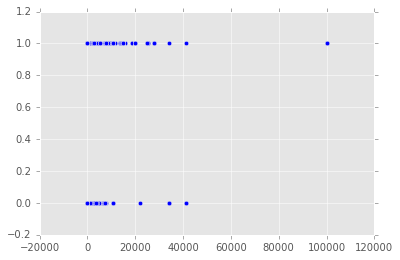

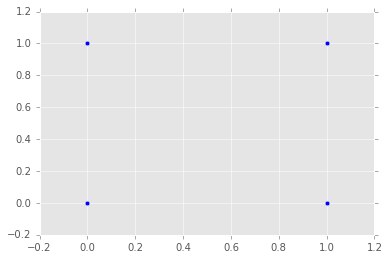

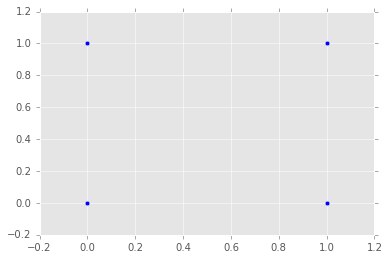

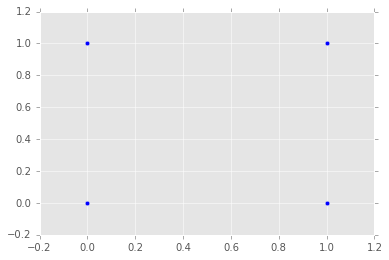

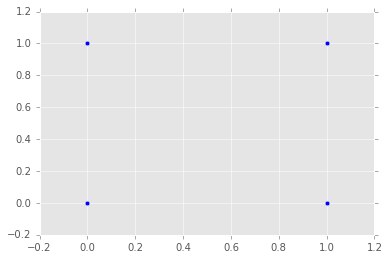

In [33]:
for x in final_df.columns[0:5]:
    plot_graphs(final_df[x], y)

In [34]:
final_df.corr

<bound method DataFrame.corr of        capital-gain  is_male  Adm-clerical  Armed-Forces  Craft-repair  \
0              2174        1           1.0           0.0           0.0   
1                 0        1           0.0           0.0           0.0   
2                 0        1           0.0           0.0           0.0   
3                 0        1           0.0           0.0           0.0   
4                 0        0           0.0           0.0           0.0   
5                 0        0           0.0           0.0           0.0   
6                 0        0           0.0           0.0           0.0   
7                 0        1           0.0           0.0           0.0   
8             14084        0           0.0           0.0           0.0   
9              5178        1           0.0           0.0           0.0   
10                0        1           0.0           0.0           0.0   
11                0        1           0.0           0.0           0.0   
12    

In [35]:
import seaborn as sns

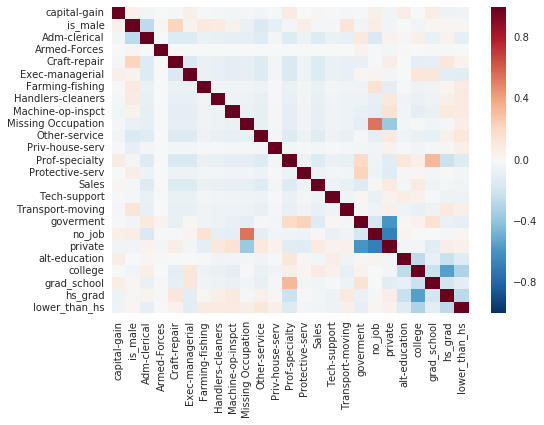

In [36]:
sns.heatmap(final_df.corr())

In [39]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(final_df)
x.shape

(48842, 25)

In [40]:
from sklearn.cluster import KMeans

kmeans = KMeans(2)

In [41]:
kmeans.fit(x)
predictions = kmeans.predict(x)

In [42]:
final_df = final_df.join(pd.DataFrame(predictions, columns=['two_classes']))

In [48]:
final_df.groupby('two_classes')[['alt-education', 'college', 'hs_grad','lower_than_hs']].count()

,alt-education,college,hs_grad,lower_than_hs
two_classes,,,,
0,33906,33906,33906,33906
1,14936,14936,14936,14936


In [50]:
dataframe_of_classes = pd.DataFrame(y).join(final_df['two_classes'])
dataframe_of_classes.corr()

,income,two_classes
income,1.000000,0.050878
two_classes,0.050878,1.000000


In [51]:
dataframe_of_classes.describe()

,income,two_classes
count,48842.000000,48842.000000
mean,0.493878,0.305802
std,0.499968,0.460828
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,1.000000
max,1.000000,1.000000


shows income category is almost nearly perfectly split


In [52]:
from sklearn.metrics import silhouette_score

In [53]:
silhouette_score?